In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [59]:
working_img = 'tree_part1.jpg'

num_cell = 50
save = False

V1_data = 'param_Thu_Jul_21_13_17_12_2022'
classical_data = 'Classical_Param_Mon_Jul_25_15_53_01_2022'



In [60]:
# Work on previously saved data
params_df = pd.read_csv('result/{img}/V1/{data}.csv'.format(img = working_img.split('.')[0], data = V1_data))
# results_df = pd.read_csv('result//results_Mon_May_23_21_46_49_2022.csv')
# total_df = pd.read_csv('result//total_Mon_May_23_21_47_07_2022.csv')

In [61]:
for index in params_df.columns:
    if (index == 'Unnamed: 0') :
        params_df.drop('Unnamed: 0', axis = 1, inplace=True)

# for index in results_df.columns:
#     if (index == 'Unnamed: 0') :
#         results_df.drop('Unnamed: 0', axis = 1, inplace=True)
# for index in total_df.columns:
#     if (index == 'Unnamed: 0') :
#         total_df.drop('Unnamed: 0', axis = 1, inplace=True)


In [62]:
params_df = params_df[params_df['num_cell'] == num_cell]

In [69]:
# save_path = os.path.join('./result/{img}/V1/'.format(img = working_img.split('.')[0]))
# fig = sns.relplot(data = params_df, x = 'alp', y = 'error', kind='line', palette='Accent', hue = 'cell_sz')
# fig.set(yscale='log')
# fig.set(xscale='log')
# fig.set(title='error for each cell_size')
# if (save):
#     fig.savefig(os.path.join(save_path, "alpha_error_per_size_{cell}_num_cell_".format(cell = num_cell) 
#                              + "_".join(str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
# plt.show()

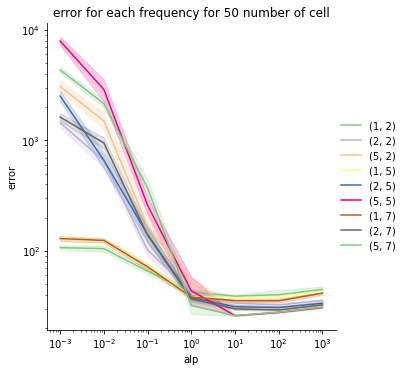

In [76]:
save_path = os.path.join('./result/{img}/V1/'.format(img = working_img.split('.')[0]))
fig = sns.relplot(data = params_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
                  hue = params_df[['sparse_freq', 'cell_sz']].apply(tuple, axis = 1))
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each frequency for {cell} number of cell'.format(cell = num_cell))
if (save):
    fig.savefig(os.path.join(save_path, "alpha_error_per_hyperparam_{cell}_num_cell_".
                             format(cell = num_cell) + "_".join(str.split(time.ctime().
                                                                          replace(":", "_"))) + ".png"), dpi = 200)

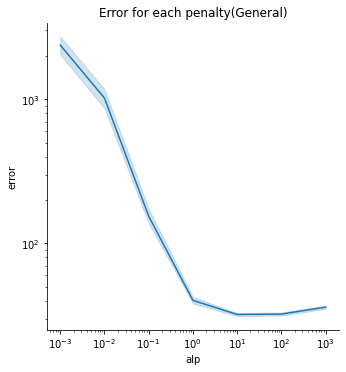

In [72]:
# save_path = os.path.join('./result/{img}/V1'.format(img = working_img.split('.')[0]))
# fig = sns.relplot(data = params_df, x = 'alp', y = 'error', kind='line')
# fig.set(yscale='log')
# fig.set(xscale='log')
# fig.set(title='Error for each penalty(General)')
# if (save):
#     fig.savefig(os.path.join(save_path, "alpha_error_general_{cell}_num_cell_".format(cell = num_cell) + "_".join(
#         str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
# plt.show()

In [71]:
# # To show how consistent randomly generated V1 weight would be for each rep. it should be about same for each repetition
# save_path = os.path.join('./result/{img}/V1/'.format(img = working_img.split('.')[0]))
# fig = sns.relplot(data = params_df, x = 'rep', y = 'error', kind='line', palette='Accent', hue = 'alp')
# fig.set(title='error consistency')
# fig.set(yscale='log')

# if (save):
#     fig.savefig(os.path.join(save_path, "alpha_error_consistency_{cell}_num_cell_".format(cell = num_cell) + "_".join(
#         str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
# plt.show()

In [67]:
compress_param_df = pd.read_csv('result/{img}/Classical/{data}.csv'.
                                format(img = working_img.split('.')[0], data = classical_data))
for index in compress_param_df.columns:
    if (index == 'Unnamed: 0') :
        compress_param_df.drop('Unnamed: 0', axis = 1, inplace=True)
compress_param_df = compress_param_df[compress_param_df['classical_samp'] == num_cell]

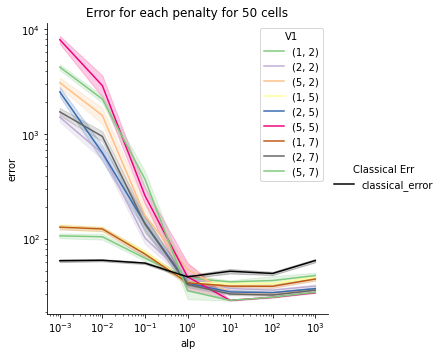

In [57]:
save_path = os.path.join('./result/{img}/'.format(img = working_img.split('.')[0]))
fig = sns.relplot(data = params_df, x = 'alp', y = 'error', kind='line', palette='Accent', 
                  hue = params_df[['sparse_freq', 'cell_sz']].apply(tuple, axis = 1), legend = False)

fig.set(title='Error for each penalty for {cell} cells'.format(cell = num_cell))
fig.map(sns.lineplot, x = 'alpha', y = 'error', data = compress_param_df, 
        label= 'classical_error', color = 'black', legend = True).add_legend(title='Classical Err', loc = 'right')
fig.set(yscale='log')
fig.set(xscale='log')
plt.legend(title = 'V1', labels =['(1, 2)', '(2, 2)', '(5, 2)', '(1, 5)', '(2, 5)', '(5, 5)', '(1, 7)', '(2, 7)', '(5, 7)'])
# plt.legend(title = 'Classical', label = ['classic'])

if (save):
    fig.savefig(os.path.join(save_path, "Error_for_each_penalty_{cell}_num_cell_".format(cell = num_cell) + "_".join(
        str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
plt.show()

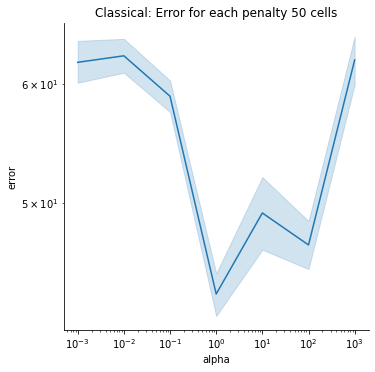

In [56]:
save_path = os.path.join('./result/{img}/Classical/'.format(img = working_img.split('.')[0]))


compress_fig = sns.relplot(data = compress_param_df, x = 'alpha', y = 'error', kind= 'line')
compress_fig.set(yscale='log')
compress_fig.set(xscale='log')
plt.title('Classical: Error for each penalty {cell} cells'.format(cell = num_cell))

if (save):
    compress_fig.savefig(os.path.join(save_path, "Error_for_each_penalty_" + "_".join(
        str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)
plt.show()